In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\ROSHAN\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('E:\Rohan\Datasets\Digital Cognition Internship\Marketing Mix Modelling\Default.csv')

In [3]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [7]:
# Creating dummy variables for defaut & student
df_1=pd.get_dummies(df)
df_1

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.62507,1,0,1,0
1,817.180407,12106.13470,1,0,0,1
2,1073.549164,31767.13895,1,0,1,0
3,529.250605,35704.49394,1,0,1,0
4,785.655883,38463.49588,1,0,1,0
...,...,...,...,...,...,...
9995,711.555020,52992.37891,1,0,1,0
9996,757.962918,19660.72177,1,0,1,0
9997,845.411989,58636.15698,1,0,1,0
9998,1569.009053,36669.11236,1,0,1,0


In [11]:
df.student.factorize()

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 Index(['No', 'Yes'], dtype='object'))

In [15]:
from sklearn.preprocessing import LabelEncoder

labels = LabelEncoder()
df["default2"] = labels.fit_transform(df["default"])
df["student2"] = labels.fit_transform(df["student"])

df.head()

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.62507,0,0
1,No,Yes,817.180407,12106.13470,0,1
2,No,No,1073.549164,31767.13895,0,0
3,No,No,529.250605,35704.49394,0,0
4,No,No,785.655883,38463.49588,0,0


In [20]:
df['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [24]:
len_no =len(df[df['default'] == 'No'])
len_yes =len(df[df['default'] == 'Yes'])
perc = (len_yes/(len_no + len_yes)) * 100
perc

3.3300000000000005

With only approx 3.33 percent of values being as Yes, for the next visualization we will reduce the number of No's to 15% and see how the comparison goes out.

In [17]:
#fig ,ax= plt.figure(figsize=(5,5))


# Take only a few of the samples where target value (default) is 'no', since default value as 'yes' is only 3 percent
df_no = df[df.default2 == 0].sample(frac=0.15)
# Take all samples  where target value is 'yes'
df_yes = df[df.default2 == 1]
df_ = df_no.append(df_yes)
df_


,default,student,balance,income,default2,student2
5883,No,Yes,1042.972565,9595.587571,0,1
137,No,No,943.796339,59976.839870,0,0
7091,No,No,712.412049,42352.091490,0,0
5172,No,No,626.160154,34007.908350,0,0
5475,No,Yes,1562.532324,13754.334070,0,1
...,...,...,...,...,...,...
9912,Yes,No,2148.898454,44309.917170,1,0
9921,Yes,Yes,1627.898323,17546.997020,1,1
9949,Yes,No,1750.253150,51578.940160,1,0
9951,Yes,No,1515.606239,48688.512090,1,0


Let us see the counts for the default column 

In [18]:
df_['default'].value_counts()

No     1450
Yes     333
Name: default, dtype: int64

Text(0.5, 1.0, 'Balance VS Income')

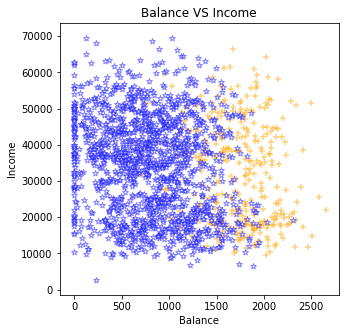

In [35]:
fig,ax= plt.subplots(figsize=(5,5))

ax.scatter(df_[df_.default=='Yes'].balance, df_[df_.default == 'Yes'].income, 
           color='orange', marker='+',alpha=0.5)

ax.scatter(df_[df_.default=='No'].balance, df_[df_.default == 'No'].income, 
           color='blue', facecolor='white',marker='*',alpha=0.5)

ax.set_ylabel('Income')
ax.set_xlabel('Balance')
ax.set_title('Balance VS Income')

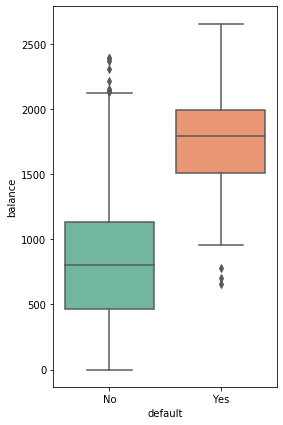

In [44]:
fig, ax =plt.subplots(figsize = (4,7))
sns.boxplot('default' ,'balance' , data=df , palette='Set2',ax=ax)

The default is observed to be 'Yes' when the balance is high. However we do observe certain outliers as well. 

The figure displays a very pronounced relationship
between the predictor balance and the response default. In most real
applications, the relationship between the predictor and the response will
not be nearly so strong. However, for the sake of illustrating the classification
procedures discussed in this chapter, we use an example in which the
relationship between the predictor and the response is somewhat exaggerated.

Let's look at a boxplot for default VS Income

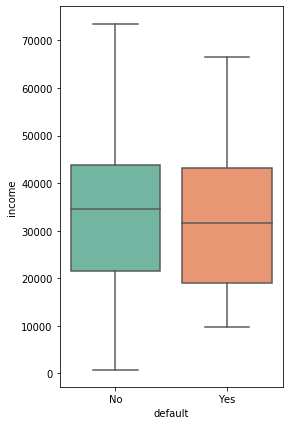

In [45]:
fig, ax =plt.subplots(figsize = (4,7))
sns.boxplot('default' ,'income' , data=df , palette='Set2',ax=ax)